# TRANSICIÓN ENERGÉTICA JUSTA EN COLOMBIA

## AJUSTES INICIALES

### Habilitar Drive

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importar librerías

In [ ]:
# @title
# Instalar ipywidgets si es necesario
!pip install -q ipywidgets

import sqlite3
import pandas as pd
import os
import gdown
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
import plotly.express as px
from io import BytesIO
from PIL import Image as PILImage
from IPython.display import Image as IPImage


### Limpiar archivos temporales .csv y .db en /content/

In [ ]:
# Limpiar archivos temporales .csv y .db en /content/
!rm -f /content/*.csv /content/*.db
print("✅ Archivos .csv y .db eliminados de /content/ (sin afectar Google Drive).")
!ls -lh /content/

✅ Archivos .csv y .db eliminados de /content/ (sin afectar Google Drive).
total 8.0K
drwx------ 7 root root 4.0K Jun 11 04:12 drive
drwxr-xr-x 1 root root 4.0K Jun  9 13:37 sample_data


### Acceder a la base datos analisis_energetico

In [ ]:
# ID del arhivo analisis_energico.db compartido
file_id = '1JtbBy7hJe2bpTEurCD7oRdpvfkcNPsz6'
output = 'analisis_energetico.db'

# Descarga el archivo analisis_energetico.db que esta alojado en Google Drive
print(f'"\nℹ️ Se descargará la base de datos {output} desde drive para trabajar localmente con ella:\n')
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Confirmación de descarga exitosa
print(f'"\n\n✅ Archivo {output} descargado exitosamente')

# Conecta la base de datos descargada analisis_energetico ya temporal en content
print("\n⏳ Conectando a la base de datos:", output )
conn = sqlite3.connect(output)

# Intentar conectar a la base de datos
try:
    conn = sqlite3.connect(output)
    print("\n✅ Conexión exitosa a la base de datos: \033[1m" + output + "\033[0m")
except Exception as e:
    print("\n❌ Error al conectar a la base de datos:", e)


"
ℹ️ Se descargará la base de datos analisis_energetico.db desde drive para trabajar localmente con ella:



Downloading...
From: https://drive.google.com/uc?id=1JtbBy7hJe2bpTEurCD7oRdpvfkcNPsz6
To: /content/analisis_energetico.db
100%|██████████| 48.3M/48.3M [00:00<00:00, 91.0MB/s]

"

✅ Archivo analisis_energetico.db descargado exitosamente

⏳ Conectando a la base de datos: analisis_energetico.db

✅ Conexión exitosa a la base de datos: analisis_energetico.db


### Visualización de las tablas presentes en la base de datos creada analisis_energetico.db

In [ ]:
# @title
# Listar tablas
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

print("📋 Tablas disponibles en la base de datos descargada:\n")
print("\n".join([f"{i+1}. {name}" for i, name in enumerate(tables['name'].tolist())]))

📋 Tablas disponibles en la base de datos descargada:

1. GDP by Country 1999-2022_LONG
2. world_country_latitude_and_longitude_values
3. International Energy Agency - CO2 emissions by sector in Colombia
4. International Energy Agency - CO2 emissions from fuel combustion, Colombia
5. International Energy Agency - electricity final consumption by sector in Colombia
6. International Energy Agency - Electricity generation from coal, Colombia
7. International Energy Agency - Electricity generation from gas, Colombia
8. International Energy Agency - Emissions from coal, Colombia
9. Monthly_Electricity_Statistics
10. población_paises_por_año_unpivoted
11. International Energy Agency - transport total final consumption by source in Colombia
12. International Energy Agency - Natural gas supply, Colombia
13. International Energy Agency - residential total final consumption by source in Colombia
14. International Energy Agency - industry total final consumption by source in Colombia
15. Internati

## ANÁLISIS EXPLORATORIO DE LOS DATOS

### Ver tipos de datos de las tablas

In [ ]:
# @title
# Obtener los nombres de las tablas
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# Recorrer cada tabla y mostrar el .info()
for table in tables:
    print(f"\n📄 Información de la tabla: {table}\n{'-'*50}")
    # Enclose the table name in double quotes to handle special characters
    df = pd.read_sql_query(f"SELECT * FROM \"{table}\";", conn)
    df.info()  # Muestra el resumen con tipos y conteos
    print(f"\n{'-'*100}\n")


📄 Información de la tabla: GDP by Country 1999-2022_LONG
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  4140 non-null   object
 1   Year     4140 non-null   int64 
 2   GDP      4140 non-null   object
dtypes: int64(1), object(2)
memory usage: 97.2+ KB

----------------------------------------------------------------------------------------------------


📄 Información de la tabla: world_country_latitude_and_longitude_values
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  245 non-null    object 
 1   latitude      245 non-null    float64
 2   longitude     245 non-null    float64
 3  

### Estadísticas descriptivas

In [ ]:
# @title
# Recorrer cada tabla y mostrar estadísticas descriptivas
for table_name in tables:
    print(f"\n🔍 Estadísticas descriptivas para la tabla: {table_name}\n")

    # Leer la tabla completa
    df = pd.read_sql_query(f"SELECT * FROM '{table_name}'", conn)

    # Mostrar estadísticas descriptivas
    print(df.describe(include='all'))

    # Línea divisoria para separar resultados
    print("-" * 80)


🔍 Estadísticas descriptivas para la tabla: GDP by Country 1999-2022_LONG

                      Country         Year   GDP
count                    4140  4140.000000  4140
unique                    180          NaN  3849
top     Afghanistan, Rep. of.          NaN     0
freq                       23          NaN   123
mean                      NaN  2010.478261   NaN
std                       NaN     7.071120   NaN
min                       NaN  1999.000000   NaN
25%                       NaN  2004.000000   NaN
50%                       NaN  2010.000000   NaN
75%                       NaN  2017.000000   NaN
max                       NaN  2022.000000   NaN
--------------------------------------------------------------------------------

🔍 Estadísticas descriptivas para la tabla: world_country_latitude_and_longitude_values

       country_code    latitude   longitude  country
count           245  245.000000  245.000000      245
unique          245         NaN         NaN      245
top     

### Resumen de nulos de las tablas

In [ ]:
# @title
# 2️⃣ Obtener nombres de todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# 3️⃣ Verificar nulos por tabla
resumen_nulos = []

for tabla in tablas:
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)
    nulos_por_columna = df.isnull().sum()
    total_nulos = nulos_por_columna.sum()

    if total_nulos > 0:
        resumen_nulos.append({
            "Tabla": tabla,
            "Total Nulos": total_nulos,
            "Columnas con Nulos": ', '.join([f"{col} ({val})" for col, val in nulos_por_columna.items() if val > 0])
        })

# 4️⃣ Mostrar resumen con estilo
if resumen_nulos:
    df_resumen = pd.DataFrame(resumen_nulos)

    def resaltar_nulos(s):
        return ['background-color: lightcoral' if v > 0 else '' for v in s]

    print("⚠️ Se encontraron nulos:")
    display(df_resumen.style.apply(resaltar_nulos, subset=["Total Nulos"]))
else:
    print("✅ Todas las tablas están limpias, sin valores nulos.")

⚠️ Se encontraron nulos:


,Tabla,Total Nulos,Columnas con Nulos
0,International Energy Agency - electricity final consumption by sector in Colombia,27,Value (27)
1,Monthly_Electricity_Statistics,30,Value (30)
2,población_paises_por_año_unpivoted,94,population (94)
3,International Energy Agency - transport total final consumption by source in Colombia,19,Value (19)
4,International Energy Agency - biofuels and waste final consumption by sector in Colombia,26,Value (26)


### Desglose detallado de nulos

In [ ]:
# @title
# 📌 Obtener todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# 📌 Preparar listas para resúmenes
resumen_nulos_general = []
resumen_nulos_columnas = []
resumen_nulos_filas = []

for tabla in tablas:
    print(f"\n🔍 Analizando la tabla: {tabla}")
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)

    # --- Resumen por columna ---
    nulos_por_columna = df.isnull().sum()
    total_nulos = nulos_por_columna.sum()
    columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

    # --- Resumen por fila ---
    filas_con_nulos = df[df.isnull().any(axis=1)]
    nulos_por_fila = filas_con_nulos.isnull().sum(axis=1)

    if total_nulos == 0:
        print("✅ No se encontraron nulos.")
    else:
        print(f"\n   ⚠️ Total de nulos: {total_nulos}")
        print(f"   📋 Columnas con nulos: {columnas_con_nulos.index.tolist()} ({len(columnas_con_nulos)} columnas)")
        print(f"   🧯 Filas con nulos: {len(filas_con_nulos)} encontradas\n")

        display(filas_con_nulos)  # mostrar solo si es útil visualmente

        # 📌 Agregar resumen por columna
        for col, count in columnas_con_nulos.items():
            resumen_nulos_columnas.append({
                'Tabla': tabla,
                'Columna': col,
                'Nulos en Columna': int(count)
            })

        # 📌 Agregar resumen por fila
        for idx, count in nulos_por_fila.items():
            resumen_nulos_filas.append({
                'Tabla': tabla,
                'Índice de Fila': idx,
                'Nulos en Fila': int(count)
            })
        # Línea divisoria para separar resultados
        print("-" * 120)

    # 📌 Resumen general (todas las tablas)
    resumen_nulos_general.append({
        'Tabla': tabla,
        'Total Nulos': int(total_nulos),
        'Columnas con Nulos': len(columnas_con_nulos),
        'Filas con Nulos': len(filas_con_nulos),
        'Nombres Columnas con Nulos': ', '.join(columnas_con_nulos.index.tolist()) if total_nulos > 0 else 'Ninguna'
    })

# --- Convertir a DataFrames finales ---
df_resumen_general = pd.DataFrame(resumen_nulos_general)
df_resumen_columnas = pd.DataFrame(resumen_nulos_columnas)
df_resumen_filas = pd.DataFrame(resumen_nulos_filas)

# --- Mostrar resúmenes ---
print("\n📊 Resumen general de nulos por tabla:")
display(df_resumen_general)

print("\n📊 Resumen de nulos por columna:")
display(df_resumen_columnas)


🔍 Analizando la tabla: GDP by Country 1999-2022_LONG
✅ No se encontraron nulos.

🔍 Analizando la tabla: world_country_latitude_and_longitude_values
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - CO2 emissions by sector in Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - CO2 emissions from fuel combustion, Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - electricity final consumption by sector in Colombia

   ⚠️ Total de nulos: 27
   📋 Columnas con nulos: ['Value'] (1 columnas)
   🧯 Filas con nulos: 27 encontradas



,Sector,Value,Year,Units
115,Fishing,NaN,2000,TJ
116,Fishing,NaN,2001,TJ
117,Fishing,NaN,2002,TJ
118,Fishing,NaN,2003,TJ
119,Fishing,NaN,2004,TJ
120,Fishing,NaN,2005,TJ
121,Fishing,NaN,2006,TJ
122,Fishing,NaN,2007,TJ
123,Fishing,NaN,2008,TJ
124,Fishing,NaN,2009,TJ


------------------------------------------------------------------------------------------------------------------------

🔍 Analizando la tabla: International Energy Agency - Electricity generation from coal, Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - Electricity generation from gas, Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - Emissions from coal, Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: Monthly_Electricity_Statistics

   ⚠️ Total de nulos: 30
   📋 Columnas con nulos: ['Value'] (1 columnas)
   🧯 Filas con nulos: 30 encontradas



,Country,Time,Balance,Product,Value,Unit
92,Costa Rica,January 2025,Remarks,Data is estimated for this month,NaN,GWh
241,Iceland,January 2025,Remarks,Data is estimated for this month,NaN,GWh
285,Japan,January 2025,Remarks,Data is estimated for this month,NaN,GWh
693,Argentina,January 2025,Remarks,Data is estimated for this month,NaN,GWh
901,Costa Rica,December 2024,Remarks,Data is estimated for this month,NaN,GWh
1049,Iceland,December 2024,Remarks,Data is estimated for this month,NaN,GWh
1712,Costa Rica,November 2024,Remarks,Data is estimated for this month,NaN,GWh
1860,Iceland,November 2024,Remarks,Data is estimated for this month,NaN,GWh
2525,Costa Rica,October 2024,Remarks,Data is estimated for this month,NaN,GWh
3337,Costa Rica,September 2024,Remarks,Data is estimated for this month,NaN,GWh


------------------------------------------------------------------------------------------------------------------------

🔍 Analizando la tabla: población_paises_por_año_unpivoted

   ⚠️ Total de nulos: 94
   📋 Columnas con nulos: ['population'] (1 columnas)
   🧯 Filas con nulos: 94 encontradas



,country_name,country_code,indicator_name,indicator_code,year,population
110,Not classified,INX,"Population, total",SP.POP.TOTL,1960,NaN
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1960,NaN
376,Not classified,INX,"Population, total",SP.POP.TOTL,1961,NaN
462,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1961,NaN
642,Not classified,INX,"Population, total",SP.POP.TOTL,1962,NaN
...,...,...,...,...,...,...
15804,Not classified,INX,"Population, total",SP.POP.TOTL,2019,NaN
16070,Not classified,INX,"Population, total",SP.POP.TOTL,2020,NaN
16336,Not classified,INX,"Population, total",SP.POP.TOTL,2021,NaN
16602,Not classified,INX,"Population, total",SP.POP.TOTL,2022,NaN


------------------------------------------------------------------------------------------------------------------------

🔍 Analizando la tabla: International Energy Agency - transport total final consumption by source in Colombia

   ⚠️ Total de nulos: 19
   📋 Columnas con nulos: ['Value'] (1 columnas)
   🧯 Filas con nulos: 19 encontradas



,Source,Value,Year,Units
6,Coal,NaN,2006,TJ
7,Coal,NaN,2007,TJ
8,Coal,NaN,2008,TJ
11,Coal,NaN,2011,TJ
13,Coal,NaN,2013,TJ
14,Coal,NaN,2014,TJ
15,Coal,NaN,2015,TJ
16,Coal,NaN,2016,TJ
17,Coal,NaN,2017,TJ
18,Coal,NaN,2018,TJ


------------------------------------------------------------------------------------------------------------------------

🔍 Analizando la tabla: International Energy Agency - Natural gas supply, Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - residential total final consumption by source in Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - industry total final consumption by source in Colombia
✅ No se encontraron nulos.

🔍 Analizando la tabla: International Energy Agency - biofuels and waste final consumption by sector in Colombia

   ⚠️ Total de nulos: 26
   📋 Columnas con nulos: ['Value'] (1 columnas)
   🧯 Filas con nulos: 26 encontradas



,Sector,Value,Year,Units
46,Transport,NaN,2000,TJ
47,Transport,NaN,2001,TJ
48,Transport,NaN,2002,TJ
49,Transport,NaN,2003,TJ
50,Transport,NaN,2004,TJ
92,Commercial and Public Services,NaN,2000,TJ
93,Commercial and Public Services,NaN,2001,TJ
94,Commercial and Public Services,NaN,2002,TJ
95,Commercial and Public Services,NaN,2003,TJ
96,Commercial and Public Services,NaN,2004,TJ


------------------------------------------------------------------------------------------------------------------------

🔍 Analizando la tabla: World Energy Balances Highlights 2024_en_CSV_unpivoted
✅ No se encontraron nulos.

🔍 Analizando la tabla: BECO_Histórico
✅ No se encontraron nulos.

🔍 Analizando la tabla: Global_Electricity_Capacity_Unpivoted
✅ No se encontraron nulos.

📊 Resumen general de nulos por tabla:


,Tabla,Total Nulos,Columnas con Nulos,Filas con Nulos,Nombres Columnas con Nulos
0,GDP by Country 1999-2022_LONG,0,0,0,Ninguna
1,world_country_latitude_and_longitude_values,0,0,0,Ninguna
2,International Energy Agency - CO2 emissions by...,0,0,0,Ninguna
3,International Energy Agency - CO2 emissions fr...,0,0,0,Ninguna
4,International Energy Agency - electricity fina...,27,1,27,Value
5,International Energy Agency - Electricity gene...,0,0,0,Ninguna
6,International Energy Agency - Electricity gene...,0,0,0,Ninguna
7,International Energy Agency - Emissions from c...,0,0,0,Ninguna
8,Monthly_Electricity_Statistics,30,1,30,Value
9,población_paises_por_año_unpivoted,94,1,94,population



📊 Resumen de nulos por columna:


,Tabla,Columna,Nulos en Columna
0,International Energy Agency - electricity fina...,Value,27
1,Monthly_Electricity_Statistics,Value,30
2,población_paises_por_año_unpivoted,population,94
3,International Energy Agency - transport total ...,Value,19
4,International Energy Agency - biofuels and was...,Value,26


### Eliminación de nulos

In [ ]:
# @title
# 📌 Obtener todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# 📌 Diccionario para almacenar las versiones "limpias" de cada tabla
tablas_limpias = {}

for tabla in tablas:
    print(f"\n🧹 Procesando la tabla: {tabla}")
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)

    total_antes = len(df)
    df_limpio = df.dropna()  # Elimina filas que tengan al menos un NaN
    total_despues = len(df_limpio)
    eliminadas = total_antes - total_despues

    if eliminadas == 0:
        print("    ✅ No se encontraron nulos. No se eliminaron filas.")
    else:
        print(f"    ⚠️ Se eliminaron {eliminadas} filas con nulos.")

    # Guardar DataFrame limpio en el diccionario
    tablas_limpias[tabla] = df_limpio



🧹 Procesando la tabla: GDP by Country 1999-2022_LONG
    ✅ No se encontraron nulos. No se eliminaron filas.

🧹 Procesando la tabla: world_country_latitude_and_longitude_values
    ✅ No se encontraron nulos. No se eliminaron filas.

🧹 Procesando la tabla: International Energy Agency - CO2 emissions by sector in Colombia
    ✅ No se encontraron nulos. No se eliminaron filas.

🧹 Procesando la tabla: International Energy Agency - CO2 emissions from fuel combustion, Colombia
    ✅ No se encontraron nulos. No se eliminaron filas.

🧹 Procesando la tabla: International Energy Agency - electricity final consumption by sector in Colombia
    ⚠️ Se eliminaron 27 filas con nulos.

🧹 Procesando la tabla: International Energy Agency - Electricity generation from coal, Colombia
    ✅ No se encontraron nulos. No se eliminaron filas.

🧹 Procesando la tabla: International Energy Agency - Electricity generation from gas, Colombia
    ✅ No se encontraron nulos. No se eliminaron filas.

🧹 Procesando la ta

### Verificación procesamiento de nulos

In [ ]:
# @title
# 📋 Informe de nulos después de limpieza con resaltado visual
informe_post_limpieza = []

for nombre, df in tablas_limpias.items():
    total_nulos = df.isnull().sum().sum()
    columnas_con_nulos = df.isnull().sum()
    columnas_afectadas = columnas_con_nulos[columnas_con_nulos > 0].index.tolist()
    filas_con_nulos = df.isnull().any(axis=1).sum()

    informe_post_limpieza.append({
        'Tabla': nombre,
        'Total Nulos': total_nulos,
        'Columnas con Nulos': len(columnas_afectadas),
        'Filas con Nulos': filas_con_nulos,
        'Nombres Columnas con Nulos': ', '.join(columnas_afectadas) if columnas_afectadas else 'Ninguna'
    })

# Crear DataFrame con el informe
df_informe_post_limpieza = pd.DataFrame(informe_post_limpieza)

# 🎨 Función para resaltar celdas con nulos
def resaltar_nulos(val):
    return 'background-color: lightcoral' if val > 0 else ''

# Mostrar resumen con estilo
print("\n📊 Informe de nulos después de la limpieza (con resaltado):")
display(df_informe_post_limpieza.style.applymap(resaltar_nulos, subset=['Total Nulos', 'Columnas con Nulos', 'Filas con Nulos']))



📊 Informe de nulos después de la limpieza (con resaltado):


<ipython-input-48-1125585953>:28: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Tabla,Total Nulos,Columnas con Nulos,Filas con Nulos,Nombres Columnas con Nulos
0,GDP by Country 1999-2022_LONG,0,0,0,Ninguna
1,world_country_latitude_and_longitude_values,0,0,0,Ninguna
2,International Energy Agency - CO2 emissions by sector in Colombia,0,0,0,Ninguna
3,"International Energy Agency - CO2 emissions from fuel combustion, Colombia",0,0,0,Ninguna
4,International Energy Agency - electricity final consumption by sector in Colombia,0,0,0,Ninguna
5,"International Energy Agency - Electricity generation from coal, Colombia",0,0,0,Ninguna
6,"International Energy Agency - Electricity generation from gas, Colombia",0,0,0,Ninguna
7,"International Energy Agency - Emissions from coal, Colombia",0,0,0,Ninguna
8,Monthly_Electricity_Statistics,0,0,0,Ninguna
9,población_paises_por_año_unpivoted,0,0,0,Ninguna


### Código para trabajar con base de datos limpia

In [ ]:
# @title
# 1️⃣ Guardar tablas limpias en nuevo archivo
ruta_limpia = "/content/analisis_energetico_limpio.db"
conn_limpio = sqlite3.connect(ruta_limpia)

for nombre, df_limpio in tablas_limpias.items():
    df_limpio.to_sql(nombre, conn_limpio, if_exists='replace', index=False)
    print(f"💾 Tabla '{nombre}' guardada sin nulos.")

conn_limpio.close()
print("✅ Base de datos limpia creada.")

# 2️⃣ Reasignar 'conn' para reutilizarlo apuntando a la base limpia
conn = sqlite3.connect(ruta_limpia)
print("🔁 Conexión reasignada: ahora 'conn' apunta a la base limpia.")

💾 Tabla 'GDP by Country 1999-2022_LONG' guardada sin nulos.
💾 Tabla 'world_country_latitude_and_longitude_values' guardada sin nulos.
💾 Tabla 'International Energy Agency - CO2 emissions by sector in Colombia' guardada sin nulos.
💾 Tabla 'International Energy Agency - CO2 emissions from fuel combustion, Colombia' guardada sin nulos.
💾 Tabla 'International Energy Agency - electricity final consumption by sector in Colombia' guardada sin nulos.
💾 Tabla 'International Energy Agency - Electricity generation from coal, Colombia' guardada sin nulos.
💾 Tabla 'International Energy Agency - Electricity generation from gas, Colombia' guardada sin nulos.
💾 Tabla 'International Energy Agency - Emissions from coal, Colombia' guardada sin nulos.
💾 Tabla 'Monthly_Electricity_Statistics' guardada sin nulos.
💾 Tabla 'población_paises_por_año_unpivoted' guardada sin nulos.
💾 Tabla 'International Energy Agency - transport total final consumption by source in Colombia' guardada sin nulos.
💾 Tabla 'Interna

### Verificación trabajo con base de datos limpia

In [ ]:
# @title
# 2️⃣ Obtener nombres de todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# 3️⃣ Verificar nulos por tabla
resumen_nulos = []

for tabla in tablas:
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)
    nulos_por_columna = df.isnull().sum()
    total_nulos = nulos_por_columna.sum()

    if total_nulos > 0:
        resumen_nulos.append({
            "Tabla": tabla,
            "Total Nulos": total_nulos,
            "Columnas con Nulos": ', '.join([f"{col} ({val})" for col, val in nulos_por_columna.items() if val > 0])
        })

# 4️⃣ Mostrar resumen con estilo
if resumen_nulos:
    df_resumen = pd.DataFrame(resumen_nulos)

    def resaltar_nulos(s):
        return ['background-color: lightcoral' if v > 0 else '' for v in s]

    print("⚠️ Se encontraron nulos:")
    display(df_resumen.style.apply(resaltar_nulos, subset=["Total Nulos"]))
else:
    print("✅ Todas las tablas están limpias, sin valores nulos.")


✅ Todas las tablas están limpias, sin valores nulos.


## DEFINICIÓN DE CONSULTAS SQL

In [ ]:
# @title
# Query base reutilizable de la tabla Monthly_Electricity_Statistics
QUERY_MES_BASE = """
SELECT Country, Product, Value, Time
FROM Monthly_Electricity_Statistics
WHERE Country NOT LIKE '%OECD%' AND Country NOT LIKE '%Total%'
"""

# Listar países únicos de la tabla Monthly_Electricity_Statistics
query_countries = """
SELECT DISTINCT Country
FROM Monthly_Electricity_Statistics
WHERE Country NOT LIKE '%OECD%' AND Country NOT LIKE '%Total%
ORDER BY Country'
"""



## MATRIZ ENERGÉTICA

### Porcentaje de participación de energéticos primarios

In [ ]:
from IPython.display import display, clear_output

# 📥 Leer datos
query = "SELECT YEAR, NOMBRE_ENERGETICO, OFERTA_INTERNA_BRUTA_TJ FROM BECO_Histórico"
df = pd.read_sql_query(query, conn)

# 🧹 Normalizar columnas
df.columns = df.columns.str.upper()
df = df.rename(columns={'NOMBRE_ENERGETICO': 'FUENTE', 'OFERTA_INTERNA_BRUTA_TJ': 'VALOR_TJ'})

# 📅 Dropdown de año
anios_disponibles = sorted(df['YEAR'].unique(), reverse=True)
selector_anio = widgets.Dropdown(
    options=anios_disponibles,
    description='Año:',
    style={'description_width': 'initial'}
)

# ✅ Checkboxes por fuente
fuentes_unicas = sorted(df['FUENTE'].unique())
checkboxes_fuentes = {f: widgets.Checkbox(value=True, description=f) for f in fuentes_unicas}
panel_checkboxes = widgets.VBox(list(checkboxes_fuentes.values()), layout=widgets.Layout(width='300px'))

# 🧩 Botones seleccionar/deseleccionar todo
btn_seleccionar = widgets.Button(description="Seleccionar todo ✅", button_style="success")
btn_deseleccionar = widgets.Button(description="Deseleccionar todo ❌", button_style="danger")
botones_control = widgets.HBox([btn_seleccionar, btn_deseleccionar])

# 🧱 Contenedor para gráficos y panel lateral
output_graficos = widgets.Output()

# 🔁 Función principal
def actualizar_graficos(_=None):
    with output_graficos:
        clear_output(wait=True)

        anio_sel = selector_anio.value
        fuentes_sel = [f for f, cb in checkboxes_fuentes.items() if cb.value]

        if not fuentes_sel:
            print("⚠️ Selecciona al menos una fuente energética.")
            return

        df_filtrado = df[(df['YEAR'] == anio_sel) & (df['FUENTE'].isin(fuentes_sel))]

        # 📊 Gráfico de torta
        fig, ax = plt.subplots(figsize=(3, 3))
        wedges, texts, autotexts = ax.pie(
            df_filtrado['VALOR_TJ'],
            labels=None,
            autopct='%1.1f%%',
            startangle=140,
            wedgeprops=dict(width=0.5)
        )
        ax.axis('equal')
        ax.set_title(f"% Participación por Fuente - {anio_sel}")
        ax.legend(
            wedges, df_filtrado['FUENTE'],
            title="Fuentes",
            loc="center left",
            bbox_to_anchor=(1, 0.5)
        )

        buf = BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')
        plt.close(fig)
        buf.seek(0)
        imagen_torta = widgets.Image(value=buf.getvalue(), format='png')

        # ✅ Mostrar panel + torta juntos
        display(widgets.HBox([panel_checkboxes, imagen_torta]))

        # 📈 Gráfico de barras apiladas
        df_energia = df[df['FUENTE'].isin(fuentes_sel)]
        df_total = df_energia.groupby('YEAR')['VALOR_TJ'].sum().reset_index(name='TOTAL_TJ')
        df_merged = df_energia.merge(df_total, on='YEAR')
        df_merged['PORCENTAJE'] = df_merged['VALOR_TJ'] / df_merged['TOTAL_TJ'] * 100

        df_pivot = df_merged.pivot_table(index='YEAR', columns='FUENTE', values='PORCENTAJE', aggfunc='sum', fill_value=0)
        df_pivot = df_pivot.sort_index(ascending=True)

        df_pivot.plot(kind='bar', stacked=True, figsize=(9, 3))
        plt.ylabel('% Uso')
        plt.xlabel('Año')
        plt.title('Evolución % Uso de Fuentes Seleccionadas')
        plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# 🔘 Funciones para seleccionar/deseleccionar todo
def seleccionar_todas_fuentes(b):
    for cb in checkboxes_fuentes.values():
        cb.value = True
    actualizar_graficos()

def deseleccionar_todas_fuentes(b):
    for cb in checkboxes_fuentes.values():
        cb.value = False
    actualizar_graficos()

btn_seleccionar.on_click(seleccionar_todas_fuentes)
btn_deseleccionar.on_click(deseleccionar_todas_fuentes)

# 🔗 Asociar eventos
selector_anio.observe(actualizar_graficos, names='value')
for cb in checkboxes_fuentes.values():
    cb.observe(actualizar_graficos, names='value')

# ▶️ Mostrar interfaz inicial
display(selector_anio, botones_control, output_graficos)
actualizar_graficos()

Dropdown(description='Año:', options=(np.int64(2021), np.int64(2020), np.int64(2019), np.int64(2018), np.int64…

Output()

### Evolución del Consumo Energético por Sector en Colombia

In [ ]:
# @title
# 🟢 Definir las tablas correspondientes a los sectores reales
tablas = {
    'Sector Transporte': 'International Energy Agency - transport total final consumption by source in Colombia',
    'Sector Residencial': 'International Energy Agency - residential total final consumption by source in Colombia',
    'Sector Industrial': 'International Energy Agency - industry total final consumption by source in Colombia'
}

# 🟢 Función que genera cada gráfico
def crear_grafico(tabla_sql):
    try:
        df = pd.read_sql_query(f'SELECT * FROM "{tabla_sql}"', conn)
        columnas_requeridas = ['Year', 'Source', 'Value']
        if all(col in df.columns for col in columnas_requeridas):
            df_pivot = df.pivot(index='Year', columns='Source', values='Value').fillna(0)
            ax = df_pivot.plot(kind='area', figsize=(9, 3), stacked=True)
            ax.set_title(f'Evolución del Consumo Energético - {tabla_sql.split(" - ")[1]}')
            ax.set_xlabel('Año')
            ax.set_ylabel('Consumo (Unidades)')
            ax.legend(title='Fuente de Energía', loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
            plt.show()
        else:
            print(f"⚠️ Columnas esperadas {columnas_requeridas} no encontradas. Columnas disponibles: {df.columns.tolist()}")
    except Exception as e:
        print(f"⚠️ Error al analizar la tabla '{tabla_sql}': {e}")

# 🟢 Crear contenido para cada pestaña
children = []
for nombre_tabla, tabla_sql in tablas.items():
    out = widgets.Output()
    with out:
        crear_grafico(tabla_sql)
    children.append(out)

# 🟢 Configurar y mostrar pestañas
tab = widgets.Tab()
tab.children = children
for i, nombre_tabla in enumerate(tablas.keys()):
    tab.set_title(i, nombre_tabla)

display(tab)

## MATRIZ ELÉCTRICA


### Se consultan de la tabla Monthly_Electricity_Statistics, los valores presentes en el campo Product

In [ ]:
# Nombre de la tabla a visualizar
tabla = 'monthly_electricity_statistics'

# Leer la tabla
df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)

# Mostrar las columnas disponibles
print(f"\n📋 Columnas disponibles de la tabla '{tabla}':\n")
for col in df.columns:
    print(col)

# Mostrar los valores únicos de la columna 'Product' en forma vertical
print(f"\n📋 Valores únicos en el campo 'Product' de la tabla '{tabla}':\n")
valores_unicos = df['Product'].unique()

for valor in valores_unicos:
    print(valor)


📋 Columnas disponibles de la tabla 'monthly_electricity_statistics':

Country
Time
Balance
Product
Value
Unit

📋 Valores únicos en el campo 'Product' de la tabla 'monthly_electricity_statistics':

Electricity
Hydro
Total Combustible Fuels
Coal, Peat and Manufactured Gases
Oil and Petroleum Products
Natural Gas
Combustible Renewables
Solar
Total Renewables (Hydro, Geo, Solar, Wind, Other)
Wind
Geothermal
Other Combustible Non-Renewables
Nuclear
Not Specified
Other Renewables


### Top 10 de países según tipo de energía y año seleccionado

In [ ]:
# @title
# Instalar squarify si es necesario
!pip install squarify

import squarify

query = """
SELECT Country, Balance, Product, Value, Unit, Time
FROM Monthly_Electricity_Statistics
WHERE Country NOT LIKE '%OECD%' AND Country NOT LIKE '%Total%'
"""
df_energy_full = pd.read_sql_query(query, conn)

# ✅ Extraer el año desde el campo 'Time'
df_energy_full['Year'] = df_energy_full['Time'].str.extract(r'(\d{4})').astype(int)

# ✅ Crear selectores interactivos
balance_selector = widgets.Dropdown(options=df_energy_full['Balance'].unique(), description='Balance:')
product_options = ['Todas'] + sorted(df_energy_full['Product'].dropna().unique().tolist())
product_selector = widgets.Dropdown(options=product_options, description='Tipo de energía:')
year_selector = widgets.Dropdown(options=sorted(df_energy_full['Year'].unique()), description='Año:')

# ✅ Definir paleta de colores
colores_contraste_medio = [
    '#4E79A7', '#F28E2B', '#76B7B2', '#E15759', '#59A14F',
    '#EDC948', '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC'
]

# ✅ Función para graficar el Treemap
def plot_treemap(balance_selected, year_selected, product_selected):
    df_filtered = df_energy_full[
        (df_energy_full['Balance'] == balance_selected) &
        (df_energy_full['Year'] == year_selected)
    ]

    if product_selected != 'Todas':
        df_filtered = df_filtered[df_filtered['Product'] == product_selected]

    df_grouped = df_filtered.groupby('Country')['Value'].sum().reset_index()
    df_top10 = df_grouped.sort_values(by='Value', ascending=False).head(10)

    if df_top10.empty:
        print("No hay datos para esta combinación.")
        return

    # ✅ Graficar el Treemap
    plt.figure(figsize=(10, 4))
    squarify.plot(
        sizes=df_top10['Value'],
        label=df_top10['Country'] + "\n" + df_top10['Value'].apply(lambda x: f"{int(x):,}"),
        color=colores_contraste_medio[:len(df_top10)],
        alpha=0.8
    )

    plt.title(f"Top 10 Países - {balance_selected} - Energía: {product_selected} - Año: {year_selected}")
    plt.axis('off')

    # ✅ Mostrar el gráfico
    plt.show()

# ✅ Configurar interacción
output = widgets.interactive_output(plot_treemap, {
    'balance_selected': balance_selector,
    'year_selected': year_selector,
    'product_selected': product_selector
})

# ✅ Mostrar controles y gráfico interactivo
display(balance_selector, product_selector, year_selector, output)

Dropdown(description='Balance:', options=('Net Electricity Production', 'Used for pumped storage', 'Distributi…

Dropdown(description='Tipo de energía:', options=('Todas', 'Coal, Peat and Manufactured Gases', 'Combustible R…

Dropdown(description='Año:', options=(np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64…

Output()

### Tendencias de generación eléctrica por fuente de energía en cualquier país.

In [ ]:
# @title
# Obtener lista de países y productos que tengan producción neta
df_opciones = pd.read_sql_query("""
SELECT DISTINCT Country, Product
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production';
""", conn)

paises = sorted(df_opciones['Country'].dropna().unique())
productos = sorted(df_opciones['Product'].dropna().unique())

# Selectores
pais_selector = widgets.Dropdown(options=paises, description='País:')
producto_selector = widgets.Dropdown(options=productos, description='Producto:')

# Función para graficar
def graficar_generacion(pais, producto):
    query = f"""
    SELECT Time, Value
    FROM Monthly_Electricity_Statistics
    WHERE Country = '{pais}'
      AND Product = '{producto}'
      AND Balance = 'Net Electricity Production'
    ORDER BY Time;
    """
    df = pd.read_sql_query(query, conn)
    df['Time'] = pd.to_datetime(df['Time'], format='%B %Y', errors='coerce')
    df = df.dropna(subset=['Time'])
    df = df.sort_values('Time')

    if df.empty:
        print(f"No hay datos de generación para {producto} en {pais}.")
        return

    fig, ax = plt.subplots(figsize=(9, 3))
    ax.plot(df['Time'], df['Value'], marker='o')
    ax.set_title(f"Evolución de generación eléctrica por medio de {producto} en {pais}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("GWh")
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mostrar interfaz
ui = widgets.HBox([pais_selector, producto_selector])
out = widgets.interactive_output(graficar_generacion, {'pais': pais_selector, 'producto': producto_selector})

display(ui, out)

Output()

### Tendencia mensual de generación de electricidad

In [ ]:
# @title
# ------------------- #
# ✅ Función de Clasificación y Filtro Avanzado
# ------------------- #
def clasificar_y_filtrar_productos(df, pais=None, tipo_energia='ambas'):
    productos_excluir = [
        'Electricity',
        'Total Combustible Fuels',
        'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
        'Not Specified',
        'Data is estimated for this month'
    ]

    productos_renovables = [
        'Hydro', 'Wind', 'Geothermal',
        'Combustible Renewables', 'Solar', 'Other Renewables'
    ]

    df_filtrado = df[~df['Product'].isin(productos_excluir)].copy()
    df_filtrado['Energy_Type'] = df_filtrado['Product'].apply(
        lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable'
    )

    if pais and pais != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Country'] == pais]

    if tipo_energia == 'renovables':
        df_filtrado = df_filtrado[df_filtrado['Energy_Type'] == 'Renewable']
    elif tipo_energia == 'no_renovables':
        df_filtrado = df_filtrado[df_filtrado['Energy_Type'] == 'Non-Renewable']

    return df_filtrado

# ------------------- #
# ✅ Cargar y preparar los datos
# ------------------- #

query = """
SELECT Product, Country, Time, Value, Balance
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production'
"""
df_energy = pd.read_sql_query(query, conn)

df_energy['Time'] = pd.to_datetime(df_energy['Time'], format='%B %Y')
df_energy['YearMonth'] = df_energy['Time'].dt.strftime('%Y-%m')

# Listas de opciones
paises = ['Todos'] + sorted(df_energy['Country'].unique().tolist())
tipos_energia = [('Renovables y no Renovables', 'ambas'), ('Solo Renovables', 'renovables'), ('Solo No Renovables', 'no_renovables')]

# Selectores interactivos
pais_selector = widgets.Dropdown(options=paises, description='País:')
energia_selector = widgets.Dropdown(options=tipos_energia, description='Tipo de Energía:')

# ------------------- #
# ✅ Función de Visualización
# ------------------- #
def generar_graficos(pais, tipo_energia):
    df_filtrado = clasificar_y_filtrar_productos(df_energy, pais=pais, tipo_energia=tipo_energia)

    df_monthly = df_filtrado.groupby(['YearMonth', 'Energy_Type'])['Value'].sum().reset_index()

    if df_monthly.empty:
        print(f"No hay datos disponibles para {pais} y tipo {tipo_energia}")
        return

    df_pivot = df_monthly.pivot(index='YearMonth', columns='Energy_Type', values='Value').fillna(0)

    if 'Renewable' in df_pivot.columns and 'Non-Renewable' in df_pivot.columns:
        df_pivot = df_pivot[['Renewable', 'Non-Renewable']]

    step = max(1, len(df_pivot.index) // 12)
    xticks_positions = np.arange(0, len(df_pivot.index), step)

    color_mapping = {'Renewable': '#2ca02c', 'Non-Renewable': '#d62728'}
    colors = [color_mapping[col] for col in df_pivot.columns]

    # 🟢 Gráfico 1: Tendencia en Líneas
    ax = df_pivot.plot(figsize=(9, 3), color=colors, linewidth=2.5)
    plt.title(f'Generación mensual de Electricidad - {pais}')
    plt.xlabel('Mes-Año', fontsize=10)
    plt.ylabel('GWh', fontsize=10)
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(df_pivot.index[xticks_positions], rotation=45, ha='right', fontsize=8)
    plt.legend(title='Tipo de Energía', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 🟢 Gráfico 2: Barras Apiladas
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(9, 3), color=colors)
    plt.title(f'Generación mensual de Electricidad - {pais}')
    plt.xlabel('Mes-Año', fontsize=10)
    plt.ylabel('GWh', fontsize=10)
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(df_pivot.index[xticks_positions], rotation=45, ha='right', fontsize=8)
    plt.legend(title='Tipo de Energía', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# ------------------- #
# ✅ Mostrar Selectores e Interfaz
# ------------------- #
display(pais_selector, energia_selector)
widgets.interactive_output(generar_graficos, {'pais': pais_selector, 'tipo_energia': energia_selector})

Dropdown(description='País:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul…

Dropdown(description='Tipo de Energía:', options=(('Renovables y no Renovables', 'ambas'), ('Solo Renovables',…

Output()

### Comparativo de países en participación porcentual del tipo energía en la Matriz Eléctrica

In [ ]:
# @title
# Query SQL a la base de datos analisis energetico, tabla Monthly_Electricity_Statistics

df= pd.read_sql_query(QUERY_MES_BASE, conn)

# Procesar año
df['Year'] = df['Time'].str.extract(r'(\d{4})').astype(int)

# Definir políticas
productos_excluir = [
    'Electricity', 'Total Combustible Fuels',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
    'Not Specified', 'Data is estimated for this month'
]

productos_renovables = [
    'Hydro', 'Wind', 'Geothermal', 'Combustible Renewables', 'Solar', 'Other Renewables'
]

# Filtrar y clasificar
df = df[~df['Product'].isin(productos_excluir)].copy()
df['Energy_Type'] = df['Product'].apply(lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable')

# Listar años disponibles
years = sorted(df['Year'].unique())
year_selector = widgets.Dropdown(options=years, description='Año:')

# Función de graficado
def graficar_porcentaje_por_pais(year_selected):
    df_year = df[df['Year'] == year_selected]

    if df_year.empty:
        print(f"No hay datos para el año {year_selected}.")
        return

    # Agrupar por país y tipo de energía
    df_grouped = df_year.groupby(['Country', 'Energy_Type'])['Value'].sum().reset_index()

    # Calcular total por país
    df_total = df_grouped.groupby('Country')['Value'].sum().reset_index(name='Total_Value')

    # Calcular porcentaje por tipo
    df_grouped = df_grouped.merge(df_total, on='Country')
    df_grouped['Percentage'] = df_grouped['Value'] / df_grouped['Total_Value'] * 100

    # Pivotear
    df_pivot = df_grouped.pivot(index='Country', columns='Energy_Type', values='Percentage').fillna(0)

    # Reordenar columnas
    if 'Renewable' in df_pivot.columns and 'Non-Renewable' in df_pivot.columns:
        df_pivot = df_pivot[['Renewable', 'Non-Renewable']]

    # Ordenar por porcentaje de renovables
    df_pivot = df_pivot.sort_values(by='Renewable', ascending=False)

    # Graficar
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(9, 4), color=['#2ca02c', '#d62728'])
    plt.title(f'Comparativo de países en participación porcentual de Energía - {year_selected}')
    plt.ylabel('Porcentaje (%)')
    plt.ylim(0, 100)

    # Leyenda afuera, alineada a la derecha
    plt.legend(title='Tipo de Energía', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

# Mostrar selector y gráficos
display(year_selector)
widgets.interactive_output(graficar_porcentaje_por_pais, {'year_selected': year_selector})

Dropdown(description='Año:', options=(np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64…

Output()

### Histórico porcentual de Energías Renovables Vs Renovables en Matriz Eléctrica según el país

In [ ]:
# @title
# Query SQL a la base de datos analisis energetico, tabla Monthly_Electricity_Statistics

df_energy_full = pd.read_sql_query(QUERY_MES_BASE, conn)

# Procesar año
df_energy_full['Year'] = df_energy_full['Time'].str.extract(r'(\d{4})').astype(int)

# ✅ Definir política oficial
productos_a_excluir = [
    'Electricity',
    'Total Combustible Fuels',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
    'Not Specified',
    'Data is estimated for this month'
]

productos_renovables = [
    'Hydro',
    'Wind',
    'Geothermal',
    'Combustible Renewables',
    'Solar',
    'Other Renewables'
]

productos_no_renovables = [
    'Coal, Peat and Manufactured Gases',
    'Oil and Petroleum Products',
    'Natural Gas',
    'Other Combustible Non-Renewables',
    'Nuclear'
]

# Filtrar excluidos
df_energy_filtered = df_energy_full[~df_energy_full['Product'].isin(productos_a_excluir)].copy()

# Clasificar
df_energy_filtered['Energy_Type'] = df_energy_filtered['Product'].apply(
    lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable'
)

# Crear selector de país
countries = ['Todos'] + sorted(df_energy_filtered['Country'].dropna().unique().tolist())
country_selector = widgets.Dropdown(options=countries, description='País:')

# ✅ Función para graficar
def plot_stacked_bars_corrected(selected_country):
    df_temp = df_energy_filtered.copy()
    if selected_country != 'Todos':
        df_temp = df_temp[df_temp['Country'] == selected_country]

    # Calcular el total anual
    df_total_by_year = df_temp.groupby('Year')['Value'].sum().reset_index().rename(columns={'Value': 'Total_Year_Value'})

    # Agrupar por tipo de energía
    df_agg = df_temp.groupby(['Year', 'Energy_Type'])['Value'].sum().reset_index()

    # Unir con el total anual
    df_agg = df_agg.merge(df_total_by_year, on='Year')

    # Calcular porcentaje
    df_agg['Percentage'] = df_agg['Value'] / df_agg['Total_Year_Value'] * 100

    # Pivotar para graficar
    df_percent_pivot = df_agg.pivot(index='Year', columns='Energy_Type', values='Percentage').fillna(0)

    # Reordenar columnas: Renovable abajo, No Renovable arriba
    if 'Renewable' in df_percent_pivot.columns and 'Non-Renewable' in df_percent_pivot.columns:
        df_percent_pivot = df_percent_pivot[['Renewable', 'Non-Renewable']]

    if df_percent_pivot.empty:
        print("No hay datos para esta selección.")
        return

    # Graficar con Matplotlib
    ax = df_percent_pivot.plot(kind='bar', stacked=True, figsize=(9, 3), color=['#2ca02c', '#d62728'])
    titulo = f'Participación Porcentual de Energía Renovable vs No Renovable - {selected_country}' if selected_country != 'Todos' else 'Participación Porcentual de Energía Renovable vs No Renovable - Global'
    plt.title(titulo)
    plt.xlabel('Año')
    plt.ylabel('Porcentaje (%)')
    plt.ylim(0, 100)

    # Leyenda fuera del gráfico
    plt.legend(title='Tipo de Energía', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    plt.tight_layout()
    plt.show()

# Configurar la interacción
output = widgets.interactive_output(plot_stacked_bars_corrected, {'selected_country': country_selector})

# Mostrar controles y gráfico
display(country_selector, output)

Dropdown(description='País:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul…

Output()

### Comparativo Histórico Energías Renovables Vs No Renovables en la Matriz Eléctrica

In [ ]:
# @title
# Listar países disponibles y agregar opción "Todos" como predeterminado
paises_query = """
SELECT DISTINCT Country
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production'
"""
paises_lista = pd.read_sql_query(paises_query, conn)['Country'].sort_values().tolist()
paises = ['Todos'] + paises_lista

# Crear selector de país con 'Todos' preseleccionado
pais_selector = widgets.Dropdown(options=paises, value='Todos', description='País:')

# Definir fuentes según la política
fuentes_renovables = "'Wind', 'Solar', 'Other Renewables', 'Hydro', 'Geothermal', 'Combustible Renewables'"
fuentes_no_renovables = "'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',  'Natural Gas', 'Other Combustible Non-Renewables', 'Nuclear'"

# Función para graficar
def graficar_subplots(pais):
    pais_sql = pais.replace("'", "''")  # Escapar comillas simples
    pais_filter = "" if pais == 'Todos' else f"AND Country = '{pais_sql}'"

    # Consulta para Renovables
    query_renovables = f"""
    SELECT SUBSTR(Time, -4) AS Year, Product, SUM(Value) AS Total_GWh
    FROM Monthly_Electricity_Statistics
    WHERE Balance = 'Net Electricity Production' AND Product IN ({fuentes_renovables}) {pais_filter}
    AND YEAR NOT LIKE '%2025%'
    GROUP BY Year, Product
    ORDER BY Year ASC
    """

    # Consulta para No Renovables
    query_no_renovables = f"""
    SELECT SUBSTR(Time, -4) AS Year, Product, SUM(Value) AS Total_GWh
    FROM Monthly_Electricity_Statistics
    WHERE Balance = 'Net Electricity Production' AND Product IN ({fuentes_no_renovables}) {pais_filter}
    AND YEAR NOT LIKE '%2025%'
    GROUP BY Year, Product
    ORDER BY Year ASC
    """

    df_ren = pd.read_sql_query(query_renovables, conn)
    df_no_ren = pd.read_sql_query(query_no_renovables, conn)

    if df_ren.empty and df_no_ren.empty:
        print(f"No hay datos disponibles para {pais}.")
        return

    # Crear figura con 2 subplots horizontales
    fig, axs = plt.subplots(1, 2, figsize=(12, 10))

    # Subplot 1: Renovables
    if not df_ren.empty:
        df_ren_pivot = df_ren.pivot(index='Year', columns='Product', values='Total_GWh').fillna(0)
        df_ren_pivot.plot(kind='bar', stacked=True, ax=axs[0], legend=False)
        axs[0].set_title('Energías Renovables')
        axs[0].set_ylabel('GWh Generados')
        legend_ren = axs[0].legend(title='Fuentes Renovables', loc='lower center', bbox_to_anchor=(0.5, -1.0), ncol=2)
    else:
        axs[0].text(0.5, 0.5, 'No hay datos renovables', ha='center', va='center')
        axs[0].axis('off')

    # Subplot 2: No Renovables
    if not df_no_ren.empty:
        df_no_ren_pivot = df_no_ren.pivot(index='Year', columns='Product', values='Total_GWh').fillna(0)
        df_no_ren_pivot.plot(kind='bar', stacked=True, ax=axs[1], legend=False)
        axs[1].set_title('Energías No Renovables')
        axs[1].set_ylabel('GWh Generados')
        legend_no_ren = axs[1].legend(title='Fuentes No Renovables', loc='lower center', bbox_to_anchor=(0.5, -1.0), ncol=2)
    else:
        axs[1].text(0.5, 0.5, 'No hay datos no renovables', ha='center', va='center')
        axs[1].axis('off')

    # Título general
    titulo = f'Comparativo Histórico Energías Renovables Vs No Renovables - {pais}' if pais != 'Todos' else 'Comparativo Histórico Energías Renovables Vs No Renovables - Global'
    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

# Mostrar selector y activar la función
display(pais_selector)
widgets.interactive_output(graficar_subplots, {'pais': pais_selector})

Dropdown(description='País:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul…

Output()

### Desglose porcentual de la matriz eléctrica

In [ ]:
# @title
# ------------------- #
# ✅ Función de Clasificación
# ------------------- #
def clasificar_y_filtrar_productos(df, pais=None, anio=None):
    productos_excluir = [
        'Electricity', 'Total Combustible Fuels', 'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
        'Not Specified', 'Data is estimated for this month'
    ]

    productos_renovables = ['Hydro', 'Wind', 'Geothermal', 'Combustible Renewables', 'Solar', 'Other Renewables']

    df_filtrado = df[~df['Product'].isin(productos_excluir)].copy()
    df_filtrado['Energy_Type'] = df_filtrado['Product'].apply(
        lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable'
    )

    if pais and pais != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Country'] == pais]

    if anio and anio != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Year'] == anio]

    return df_filtrado

# ------------------- #
# ✅ Cargar Datos y Preparar Selectores
# ------------------- #

query = """
SELECT Product, Country, Time, Value, Balance
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production'
"""
df_energy = pd.read_sql_query(query, conn)

df_energy['Time'] = pd.to_datetime(df_energy['Time'], format='%B %Y')
df_energy['Year'] = df_energy['Time'].dt.year

paises = ['Todos'] + sorted(df_energy['Country'].unique().tolist())
anios = ['Todos'] + sorted(df_energy['Year'].unique().tolist())

pais_selector = widgets.Dropdown(options=paises, description='País:')
anio_selector = widgets.Dropdown(options=anios, description='Año:')

# ------------------- #
# ✅ Función de Visualización
# ------------------- #
def generar_tortas(pais, anio):
    df_filtrado = clasificar_y_filtrar_productos(df_energy, pais, anio)

    df_grouped = df_filtrado.groupby(['Energy_Type', 'Product'])['Value'].sum().reset_index()

    df_renovables = df_grouped[df_grouped['Energy_Type'] == 'Renewable']
    df_no_renovables = df_grouped[df_grouped['Energy_Type'] == 'Non-Renewable']

    if df_grouped.empty:
        print("No hay datos disponibles para la selección.")
        return

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

    # 🟢 Torta Renovables
    if not df_renovables.empty:
        axs[0].pie(df_renovables['Value'], labels=df_renovables['Product'],
                   autopct='%1.1f%%', startangle=90)
        axs[0].set_title('Participación de Energías Renovables')
    else:
        axs[0].text(0.5, 0.5, 'No hay datos renovables', ha='center', va='center')
        axs[0].axis('off')

    # 🔴 Torta No Renovables
    if not df_no_renovables.empty:
        axs[1].pie(df_no_renovables['Value'], labels=df_no_renovables['Product'],
                   autopct='%1.1f%%', startangle=90)
        axs[1].set_title('Participación de Energías No Renovables')
    else:
        axs[1].text(0.5, 0.5, 'No hay datos no renovables', ha='center', va='center')
        axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# ------------------- #
# ✅ Mostrar Selectores e Interfaz
# ------------------- #
display(pais_selector, anio_selector)
widgets.interactive_output(generar_tortas, {'pais': pais_selector, 'anio': anio_selector})

Dropdown(description='País:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul…

Dropdown(description='Año:', options=('Todos', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 202…

Output()

### Evolución Histórica de la Matriz Eléctrica por paises en GWh

In [ ]:
# @title
# Query para listar países

countries = pd.read_sql_query(query_countries, conn)['Country'].sort_values().tolist()
country_selector = widgets.Dropdown(options=countries, description='País:')

# Obtener años por país
def get_years_for_country(country):
    query = f"""
        SELECT DISTINCT SUBSTR(Time, -4) AS Year
        FROM Monthly_Electricity_Statistics
        WHERE Country = '{country}'
    """
    years = pd.read_sql_query(query, conn)['Year'].astype(int).sort_values().tolist()
    return ['Todos'] + years

# Crear selector de año dinámico
def update_year_selector(*args):
    selected_country = country_selector.value
    year_selector.options = get_years_for_country(selected_country)

year_selector = widgets.Dropdown(description='Año:')
country_selector.observe(update_year_selector, names='value')
update_year_selector()

# Función para graficar
def plot_energy_evolution(selected_country, selected_year):
    query = f"""
        SELECT Country, Product, Value, Time
        FROM Monthly_Electricity_Statistics
        WHERE Country = '{selected_country}'
    """
    df = pd.read_sql_query(query, conn)
    df['year'] = df['Time'].str.extract(r'(\d{4})').astype(int)

    # Exclusión de productos no deseados
    productos_excluir = [
        'Electricity', 'Total Combustible Fuels',
        'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
        'Not Specified', 'Data is estimated for this month'
    ]
    df = df[~df['Product'].isin(productos_excluir)].copy()

    if selected_year != 'Todos':
        df = df[df['year'] == selected_year]

    if df.empty:
        print(f"No hay datos disponibles para {selected_country} en {selected_year}.")
        return

    # Agrupar por año y producto
    df_gen_year = df.groupby(['year', 'Product'])['Value'].mean().reset_index()

    # Filtrar productos con valores positivos
    productos_validos = df_gen_year.groupby('Product')['Value'].sum()
    productos_validos = productos_validos[productos_validos > 0].index.tolist()

    # Gráfico
    fig, ax = plt.subplots(figsize=(10, 3))
    colors = plt.cm.tab20.colors

    for i, product in enumerate(productos_validos):
        df_product = df_gen_year[df_gen_year['Product'] == product]
        ax.bar(df_product['year'] + i * 0.2, df_product['Value'],
               width=0.2, label=product, color=colors[i % len(colors)])

    title_year = f" en {selected_year}" if selected_year != 'Todos' else ""
    ax.set_title(f'Evolución de la producción de energía en {selected_country}{title_year}', fontsize=12)
    ax.set_xlabel('Año', fontsize=10)
    ax.set_ylabel('Energía Promedio [GWh]', fontsize=10)
    ax.legend(title='Tipo de Energía', loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Mostrar selectores y gráfico
display(country_selector, year_selector)
widgets.interactive_output(plot_energy_evolution, {
    'selected_country': country_selector,
    'selected_year': year_selector
})


Dropdown(description='País:', options=('Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', '…

Dropdown(description='Año:', options=('Todos', 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 202…

Output()

### Evolución Histórica Porcentual de la Matriz Eléctrica por paises

In [ ]:
# @title
# Listar países únicos de la tabla Monthly_Electricity_StatisticsBY Country

df_paises = pd.read_sql_query(query_countries, conn)

# 📌 Crear el selector de país
pais_selector = widgets.Dropdown(
    options=df_paises['Country'].sort_values().tolist(),
    description='País:',
    layout=widgets.Layout(width='50%')
)


# 📌 4. Función para mostrar el gráfico de barras apiladas excluyendo 'Total'
def mostrar_barras_apiladas(pais):
    pais_sql = pais.replace("'", "''")  # Escapar apóstrofes para SQL
    query = f"""
        SELECT
            substr(Time, -4) AS Year,
            Product,
            SUM(Value) AS Total_Value
        FROM monthly_electricity_statistics
        WHERE Country = '{pais_sql}'
          AND Product IN ('Hydro', 'Wind', 'Solar', 'Biomass', 'Geothermal',
                          'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products', 'Natural Gas', 'Nuclear')
        GROUP BY Year, Product
        ORDER BY Year;
    """

    df_barras = pd.read_sql_query(query, conn)

    if df_barras.empty:
        print(f"No hay datos históricos para {pais}.")
    else:
        # Calcular participación porcentual
        df_totales = df_barras.groupby('Year')['Total_Value'].sum().reset_index().rename(columns={'Total_Value': 'Year_Total'})
        df_barras = df_barras.merge(df_totales, on='Year')
        df_barras['Participation_%'] = (df_barras['Total_Value'] / df_barras['Year_Total']) * 100

        # Reorganizar para gráfico pivotando
        pivot_df = df_barras.pivot(index='Year', columns='Product', values='Participation_%').fillna(0)

        # 📌 Ordenar columnas por la suma total de participación de mayor a menor
        column_order = pivot_df.sum().sort_values(ascending=False).index
        pivot_df = pivot_df[column_order]

        # Generar gráfico
        pivot_df.plot(kind='bar', stacked=True, figsize=(9, 3))
        plt.title(f'Evolución Histórica de la Matriz Eléctrica en {pais}')
        plt.ylabel('Participación (%)')
        plt.xlabel('Año')
        plt.legend(title='Fuente de Energía', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

# 📌 5. Crear interacción
widgets.interact(mostrar_barras_apiladas, pais=pais_selector)

interactive(children=(Dropdown(description='País:', layout=Layout(width='50%'), options=('Argentina', 'Austral…

<function __main__.mostrar_barras_apiladas(pais)>

## CONSUMO ELÉCTRICO COLOMBIA

### % Consumo de energía eléctrica por sector en Colombia

In [ ]:
# @title
# ✅ Listar años disponibles
query_years = """
SELECT DISTINCT Year
FROM "International Energy Agency - electricity final consumption by sector in Colombia"
"""
years = pd.read_sql_query(query_years, conn)['Year'].astype(int).sort_values().tolist()

# ✅ Crear selector de año
year_selector = widgets.Dropdown(
    options=years,
    description='Año:',
    style={'description_width': 'initial'}
)

# ✅ Función para graficar con orden descendente
def plot_sector_consumption(selected_year):
    query = """
    SELECT *
    FROM "International Energy Agency - electricity final consumption by sector in Colombia"
    """
    df = pd.read_sql_query(query, conn)
    df_year = df[df['Year'] == selected_year]

    if df_year.empty:
        print(f"No hay datos disponibles para el año {selected_year}.")
        return

    # Agrupar por sector y ordenar de mayor a menor
    sector_column = 'Sector'
    df_grouped = df_year.groupby(sector_column)['Value'].sum().reset_index()
    df_grouped['Percentage'] = df_grouped['Value'] / df_grouped['Value'].sum() * 100
    df_grouped = df_grouped.sort_values('Value', ascending=False).reset_index(drop=True)

    # ✅ Gráfico de barras horizontales con colores distintos y ordenado
    plt.figure(figsize=(9, 3))
    y_positions = range(len(df_grouped))
    colors = plt.cm.tab10.colors
    color_map = [colors[i % len(colors)] for i in range(len(df_grouped))]

    plt.barh(y_positions, df_grouped['Value'], color=color_map)
    plt.yticks(y_positions, df_grouped[sector_column])
    plt.gca().invert_yaxis()  # Invertir eje para mayor arriba
    plt.xlabel('Consumo Eléctrico [TJ]')
    plt.title(f'Consumo Eléctrico por Sector en Colombia - {selected_year}')

    # Mostrar porcentaje en cada barra
    for i, (value, percentage) in enumerate(zip(df_grouped['Value'], df_grouped['Percentage'])):
        plt.text(value + value * 0.01, i, f"{percentage:.1f}%", va='center')

    plt.tight_layout()
    plt.show()

# ✅ Mostrar selector y gráfico
display(year_selector)
widgets.interactive_output(plot_sector_consumption, {'selected_year': year_selector})

Dropdown(description='Año:', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, …

Output()

### Evolución Histórica del Consumo Eléctrico por Sector en Colombia

<Figure size 900x300 with 0 Axes>

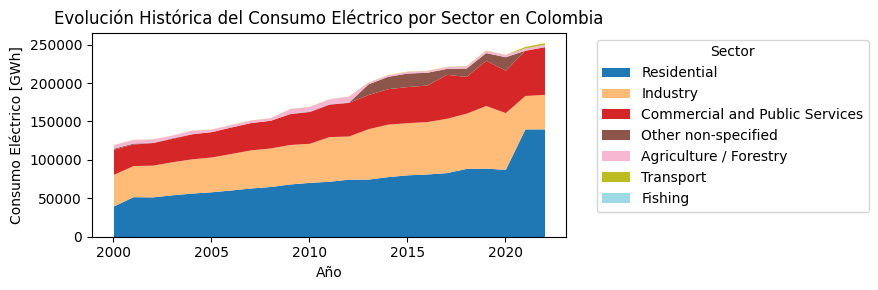

In [ ]:
# @title
# Cargar toda la tabla
query = """
SELECT *
FROM "International Energy Agency - electricity final consumption by sector in Colombia"
"""
df = pd.read_sql_query(query, conn)

# Asegurarse que el campo de año sea entero
df['Year'] = df['Year'].astype(int)

# Ajusta aquí si el nombre de la columna sector es diferente
sector_column = 'Sector'  # Cambia si tu columna tiene otro nombre

# Agrupar por año y sector
df_grouped = df.groupby(['Year', sector_column])['Value'].sum().reset_index()

# Pivotear para área apilada
df_pivot = df_grouped.pivot(index='Year', columns=sector_column, values='Value').fillna(0)

# Ordenar columnas de mayor a menor consumo total
order = df_pivot.sum().sort_values(ascending=False).index.tolist()
df_pivot = df_pivot[order]

# ✅ Gráfico de área apilada
plt.figure(figsize=(9, 3))
df_pivot.plot.area(figsize=(9, 3), linewidth=0, cmap='tab20')

plt.title('Evolución Histórica del Consumo Eléctrico por Sector en Colombia')
plt.xlabel('Año')
plt.ylabel('Consumo Eléctrico [GWh]')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## EMISIONES DE CO2


In [ ]:
# @title
# 📌 5. Definir nombres exactos de las tablas de emisiones
tabla_sector = 'International Energy Agency - CO2 emissions by sector in Colombia'
tabla_fuel = 'International Energy Agency - CO2 emissions from fuel combustion, Colombia'

# 📌 6. Cargar el contenido detallado de ambas tablas
df_sector_detallado = pd.read_sql_query(f'''
    SELECT
      Year,
      Sector,
      "Value" AS Emissions
    FROM "{tabla_sector}"
    ORDER BY Year, "Sector";
''', conn)


df_fuel_detallado = pd.read_sql_query(f'''
    SELECT Year, "Fuel", "CO2 emissions from fuel combustion, Colombia" AS Emissions
    FROM "{tabla_fuel}"
    ORDER BY Year, "Fuel";
''', conn)


# Convertir Year a string para manejarlo en matplotlib
df_sector_detallado['Year'] = df_sector_detallado['Year'].astype(str)

# 📌 3. Convertir 'Emissions' a numérico si es necesario
df_fuel_detallado['Emissions'] = pd.to_numeric(df_fuel_detallado['Emissions'], errors='coerce')

# Crear DataFrame pivotado
pivot_df = df_sector_detallado.pivot_table(
    index='Year',
    columns='Sector',
    values='Emissions',
    aggfunc='sum'
).fillna(0)

# 📌 2. Selector de tipo de gráfico
tipo_grafico_selector = widgets.Dropdown(
    options=['Línea', 'Área No Apilada', 'Área Apilada'],
    description='Tipo de Gráfico:',
    layout=widgets.Layout(width='50%')
)

# 📌 3. Función para graficar con Matplotlib según línea, área no apilada, área apilada
def mostrar_grafico(tipo_grafico):
    plt.figure(figsize=(9, 3))

    if tipo_grafico == 'Línea':
        pivot_df.plot(kind='line', marker='o', figsize=(9, 3))
        plt.title('Evolución de las Emisiones de CO2 por Sector en Colombia (Línea)')

    elif tipo_grafico == 'Área No Apilada':
        for column in pivot_df.columns:
            plt.fill_between(pivot_df.index, pivot_df[column], label=column, alpha=0.5)
        plt.title('Evolución de las Emisiones de CO2 por Sector en Colombia (Área No Apilada)')

    elif tipo_grafico == 'Área Apilada':
        # 📌 Recalcular orden de columnas según el total acumulado
        column_order = pivot_df.sum().sort_values(ascending=False).index
        pivot_df_sorted = pivot_df[column_order]

        # 📌 Graficar área apilada ordenada
        pivot_df_sorted.plot(kind='area', stacked=True, figsize=(9, 3), alpha=0.7)
        plt.title('Evolución de las Emisiones de CO2 por Sector (Área Apilada Ordenada)')

    plt.ylabel('Emisiones (MtCO2)')
    plt.xlabel('Año')
    plt.xticks(rotation=90)
    plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 📌 4. Crear la interacción
widgets.interact(mostrar_grafico, tipo_grafico=tipo_grafico_selector)


# 📌 4. Calcular participación porcentual por año y sector en gráfico de barras apiladas
df_sector_total = df_sector_detallado.groupby('Year')['Emissions'].sum().reset_index(name='Total_Emissions')
df_sector_porcentual = df_sector_detallado.merge(df_sector_total, on='Year')
df_sector_porcentual['Participation_%'] = (df_sector_porcentual['Emissions'] / df_sector_porcentual['Total_Emissions']) * 100

# 📌 5. Ordenar de mayor a menor participación por año
df_sector_porcentual = df_sector_porcentual.sort_values(['Year', 'Participation_%'], ascending=[True, False])

# 📌 6. Pivotear datos
pivot_porcentual = df_sector_porcentual.pivot(index='Year', columns='Sector', values='Participation_%').fillna(0)

# 📌 7. Ordenar columnas de mayor a menor según participación total acumulada
column_order = pivot_porcentual.sum().sort_values(ascending=False).index
pivot_porcentual = pivot_porcentual[column_order]

interactive(children=(Dropdown(description='Tipo de Gráfico:', layout=Layout(width='50%'), options=('Línea', '…

<ipython-input-67-3675573226>:10: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.



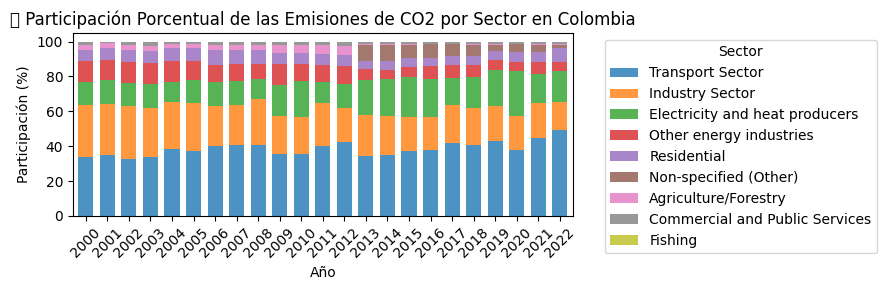

In [ ]:
# @title
# 📌 8. Gráfico de barras apiladas ordenadas de mayor a menor
pivot_porcentual.plot(kind='bar', stacked=True, figsize=(9, 3), alpha=0.8, width=0.7)

plt.title('🟢 Participación Porcentual de las Emisiones de CO2 por Sector en Colombia')
plt.ylabel('Participación (%)')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## FACTOR DE CAPACIDAD

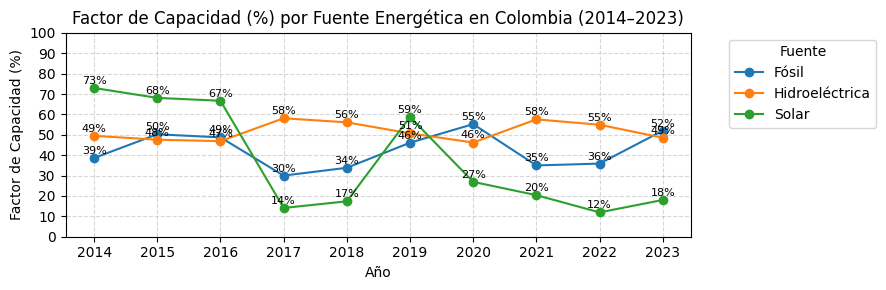

In [ ]:
# @title
import pandas as pd
import numpy as np

# ✅ 1. Cargar generación mensual y procesar
query_gen = """
SELECT Time, Product, Value
FROM Monthly_Electricity_Statistics
WHERE Country = 'Colombia'
  AND Balance = 'Net Electricity Production'
  AND Product IN (
    'Hydro',
    'Coal, Peat and Manufactured Gases',
    'Oil and Petroleum Products',
    'Natural Gas',
    'Combustible Renewables',
    'Solar'
  )
  AND Value IS NOT NULL
"""
df_gen = pd.read_sql_query(query_gen, conn)
df_gen["Year"] = df_gen["Time"].str.extract(r'(\d{4})').astype(int)

# ✅ Agrupar fuentes fósiles bajo una sola categoría
df_gen["Fuente"] = df_gen["Product"].replace({
    "Coal, Peat and Manufactured Gases": "Fósil",
    "Oil and Petroleum Products": "Fósil",
    "Natural Gas": "Fósil",
    "Hydro": "Hidroeléctrica",
    "Combustible Renewables": "Biomasa",
    "Solar": "Solar"
})

# ✅ Agrupar generación anual por fuente unificada
df_gen_grouped = df_gen.groupby(["Year", "Fuente"])["Value"].sum().reset_index(name="Generacion_GWh")

# ✅ 2. Cargar capacidad instalada
query_cap = """
SELECT Year, Indicator, Capacity_GW
FROM Global_Electricity_Capacity_Unpivoted
WHERE Country = 'Colombia'
  AND Indicator IN (
    'Hydroelectricity (million kW)',
    'Fossil fuels (million kW)',
    'Combustible Renewables (million kW)',
    'Solar (million kW)'
  )
"""
df_cap = pd.read_sql_query(query_cap, conn)

# ✅ Mapear nombres para coincidir con df_gen_grouped
df_cap["Fuente"] = df_cap["Indicator"].replace({
    "Hydroelectricity (million kW)": "Hidroeléctrica",
    "Fossil fuels (million kW)": "Fósil",
    "Combustible Renewables (million kW)": "Biomasa",
    "Solar (million kW)": "Solar"
})

# ✅ Filtrar años coincidentes
df_gen_grouped = df_gen_grouped[df_gen_grouped["Year"].between(2014, 2023)]
df_cap = df_cap[df_cap["Year"].between(2014, 2023)]

# ✅ Unir y calcular factor de capacidad
df_fc = pd.merge(df_gen_grouped, df_cap[["Year", "Fuente", "Capacity_GW"]], on=["Year", "Fuente"], how="inner")
df_fc["Factor_Capacidad_%"] = (df_fc["Generacion_GWh"] / (df_fc["Capacity_GW"] * 8760)) * 100
df_fc["Factor_Capacidad_%"] = df_fc["Factor_Capacidad_%"].round(2)

# ✅ Graficar series de tiempo con etiquetas numéricas
plt.figure(figsize=(9, 3))
for fuente in df_fc["Fuente"].unique():
    datos = df_fc[df_fc["Fuente"] == fuente]
    plt.plot(datos["Year"], datos["Factor_Capacidad_%"], marker="o", label=fuente)

    # Añadir etiquetas con valores
    for x, y in zip(datos["Year"], datos["Factor_Capacidad_%"]):
        plt.text(x, y + 1, f"{y:.0f}%", ha='center', va='bottom', fontsize=8)

plt.title("Factor de Capacidad (%) por Fuente Energética en Colombia (2014–2023)", fontsize=12)
plt.xlabel("Año")
plt.ylabel("Factor de Capacidad (%)")
plt.ylim(0, 100)
plt.xticks(np.arange(2014, 2024, 1))
plt.yticks(np.arange(0, 101, 10))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Fuente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

